# Анализ предпочтений клиентов авиакомпании по городам России

Изначально данные находились в щести таблицах airports, aircrafts, tickets, flights, ticket_flights, festivals.


Мы сгруппировали необходимую информацию об авиаперелетах в две таблицы с аггрегированными данными:
     - Количество рейсов различных моделей самолетов в сентябре 2018г.
     - Среднее количество рейсов, прибывающих за день в различные города России в августе 2018г.
     
Цель исследования - проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали чтобы понять предпочтения пользователей, покупающих билеты на те или иные направления.

План работы:

<br>1 - Загрузка и обзор данных 
<br>2 - Предобработка данных
<br>3 - Исследовательский анализ
<br>4 - Вывод

### Загрузка данных

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly 
import warnings
import orca
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup

<div class="alert alert-block alert-info"> Для отображения некоторых графиков потребуется библиотека Plotly версии не ниже 4.5

Установите библиотеку при необходимости
</div>

In [49]:
raw_models = pd.read_csv("/query_1.csv")
raw_cities = pd.read_csv("/query_3.csv")

Проведем первичный обзор каждой таблицы

In [50]:
def table_info(table_name):
    print()
    print('Первые 5 строк:')
    display(table_name.head())
    print()
    print('Информация о содержащихся данных:')
    print()
    display(table_name.info())
    print('Обзор числовых данных:')
    display(table_name.describe())
    print('Число дубликатов:')
    display(table_name.duplicated().sum())
    

In [51]:
print('Обзор таблицы models')
table_info(raw_models)

Обзор таблицы models

Первые 5 строк:


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300



Информация о содержащихся данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

Обзор числовых данных:


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Число дубликатов:


0

В таблице всего 8 строк. Нет пропущенных значений и дубликатов. Данные о количестве рейсов варьируются от 300 до 4557.

In [52]:
print('Обзор таблицы cities')
table_info(raw_cities)

Обзор таблицы cities

Первые 5 строк:


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613



Информация о содержащихся данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

Обзор числовых данных:


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Число дубликатов:


0

В таблице 101 строка. Нет пропущенных значений и дубликатов. Данные о среднесуточном количестве прилетов варьируются от 1 до 129.

In [53]:
df_models = raw_models.copy()
df_cities = raw_cities.copy()

#### Вывод

Таблицы содержат информацию о количестве рейсов восьми различных моделей самолетов между ста городами России 
в августе и сентябре 2018 года. В представленных данных нет пропущенных значений, дубликатов или аномальных значений.
В числовых столбцах нужно изменить тип данных.

### Предобработка данных


Изменим форматы числовых данных в таблицах

In [54]:
# Функция подсчета памяти, используемой для хнанения данных

def mem_usage(data):
    usage_b = data.memory_usage(deep=True).sum()
    return usage_b.round(3)

In [55]:
print('Использование памяти до оптимизации формата :', mem_usage(df_models), 'байт')
df_models['flights_amount'] = pd.to_numeric(df_models['flights_amount'], downcast='integer')
print('Использование памяти после оптимизации формата :', mem_usage(df_models), 'байт')
print('Новый формат данных :',df_models['flights_amount'].dtype)

Использование памяти до оптимизации формата : 775 байт
Использование памяти после оптимизации формата : 727 байт
Новый формат данных : int16


In [56]:
print('Использование памяти до оптимизации формата :', mem_usage(df_cities), 'байт')
df_cities['average_flights'] = pd.to_numeric(df_cities['average_flights'], downcast='float')
print('Использование памяти после оптимизации формата :', mem_usage(df_cities), 'байт')
print('Новый формат данных :',df_cities['average_flights'].dtype)

Использование памяти до оптимизации формата : 12710 байт
Использование памяти после оптимизации формата : 12306 байт
Новый формат данных : float32


#### Вывод

Форматы числовых данных в обеих таблицах оптимизированы. Названия моделей самолетов и городов имеют верный формат

### Исследовательский анализ

Изучим полученные данные

#### Выберем топ-10 городов по количеству рейсов

In [57]:
df_cities_top = df_cities.sort_values('average_flights', ascending=False, inplace=False).head(10)
df_cities_top

,city,average_flights
43,Москва,129.774200
70,Санкт-Петербург,31.161291
54,Новосибирск,17.322580
33,Красноярск,11.580646
20,Екатеринбург,11.322580
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612904
84,Ульяновск,9.580646


#### Отобразим количество рейсов для каждой модели самолета в сентябре 2018 года на графике

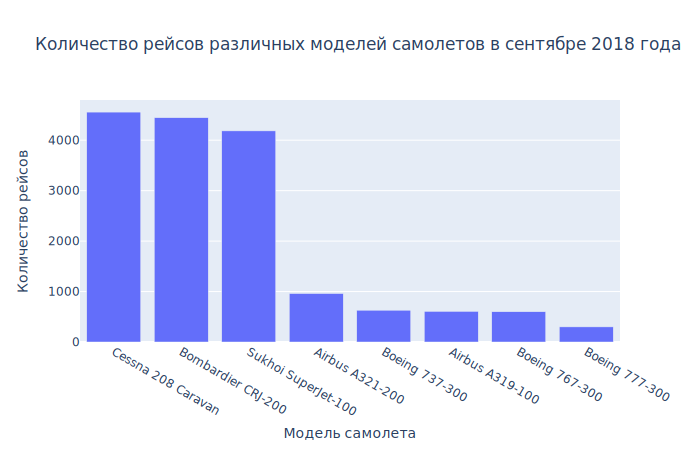

In [61]:
fig = px.bar(df_models.sort_values('flights_amount', ascending = False),  x = 'model', y = 'flights_amount', 
             labels={
                     "model": "Модель самолета",
                     "flights_amount": "Количество рейсов",
                     "species": "Species of Iris"
                 },
             title="Количество рейсов различных моделей самолетов в сентябре 2018 года")
fig.show("svg")

На графике видно, что из восьми типов самолетов три модели совершили более 4000 рейсов, в то время как остальные пять - от 300 до 900 рейсов. Такое разделение, возможно, обусловлено разностью в размере самолетов. Основная часть внутренних перелетов приходится на региональные рейсы, т.е. малый и средний размер воздушного судна как у лидеров списка. Остальные модели самолетов больше по размеру и чаще используются на международных рейсах, которые в нашем исследовании не представлены.

#### Построим график зависимости среднесуточного количества рейсов от города прилета в августе 2018 года.


Так как количество значений довольно большое, для информативного отображения информации по всем городам построим TreeMap из библиотеки Plotly. Для этого нам нужно разбить все города по категориям. Наиболее логичным будет использовать данные о принадлежности города к региону и федеральному округу России. Обогатим наши даннные информацией из Википедии о городах России.

In [62]:
russia_cities_wiki = requests.get( "https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8")
soup = BeautifulSoup(russia_cities_wiki.text, "lxml")

column_names = []
content = []
element = []
for n, tag_content in enumerate(soup.find_all("th")):
    if n in [3,4,5]:
        column_names.append(tag_content.text)

for tag_content in soup.find_all("tr"):
    if not tag_content.find_all('th'):
            desc = [element.text for element in tag_content.find_all('td')]
            content.append(desc[2:5])

# Предобработка новых данных

russia_cities = pd.DataFrame(content, columns = column_names)
russia_cities.columns = ['city', 'region', 'federal_unit']
russia_cities = russia_cities[~russia_cities['city'].isnull()]
russia_cities['city'] = russia_cities.apply(lambda row : row[0].strip(), axis = 1)
russia_cities['region'] = russia_cities.apply(lambda row : row[1].strip(), axis = 1)
russia_cities['federal_unit'] = russia_cities.apply(lambda row : row[2].strip(), axis = 1)
russia_cities = russia_cities[russia_cities['city'].isin(list(df_cities['city'].unique()))]
russia_cities.reset_index(drop = True, inplace = True)
display(russia_cities.head())
russia_cities.info()

,city,region,federal_unit
0,Абакан,Хакасия,Сибирский
1,Анадырь,Чукотский АО,Дальневосточный
2,Анапа,Краснодарский край,Южный
3,Архангельск,Архангельская область,Северо-Западный
4,Астрахань,Астраханская область,Южный


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          104 non-null    object
 1   region        104 non-null    object
 2   federal_unit  104 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


В полученной таблице 104 города, а не 101 как в исходной таблице. Рассмотрим уникальные названия городов

In [63]:
russia_cities['city'].value_counts()

Киров           2
Мирный          2
Благовещенск    2
Салехард        1
Кемерово        1
               ..
Ижевск          1
Воронеж         1
Липецк          1
Тюмень          1
Бугульма        1
Name: city, Length: 101, dtype: int64

Дублирование происходит, потому что некоторые города в разных регионах имеют одинаковое название.

Удалим дуликаты. 

In [64]:
russia_cities['city'] = russia_cities['city'].drop_duplicates()
russia_cities.dropna()

,city,region,federal_unit
0,Абакан,Хакасия,Сибирский
1,Анадырь,Чукотский АО,Дальневосточный
2,Анапа,Краснодарский край,Южный
3,Архангельск,Архангельская область,Северо-Западный
4,Астрахань,Астраханская область,Южный
...,...,...,...
99,Чита,Забайкальский край,Сибирский
100,Элиста,Калмыкия,Южный
101,Южно-Сахалинск,Сахалинская область,Дальневосточный
102,Якутск,Якутия,Дальневосточный


In [65]:
# Объединим таблицы по городам

df_cities_reg = df_cities.copy()
df_cities_reg = df_cities_reg.merge(russia_cities)
df_cities_reg.head()

,city,average_flights,region,federal_unit
0,Абакан,3.870968,Хакасия,Сибирский
1,Анадырь,1.000000,Чукотский АО,Дальневосточный
2,Анапа,2.161290,Краснодарский край,Южный
3,Архангельск,5.354839,Архангельская область,Северо-Западный
4,Астрахань,2.451613,Астраханская область,Южный


Построим распределение городов по среднесуточному количеству рейсов. Площадь блока отображает среднее значение числа рейсов в день в соответствующем городе, регионе или федеральном округе. Цвет блока соответствует принадлежность к тому или иному федеральному округу.

Благодаря интерактивному интерфейсу библиотеки plotly мы можем выбирать интересующий нас блок для более подробного изучения по регионам и по отдельным городам.

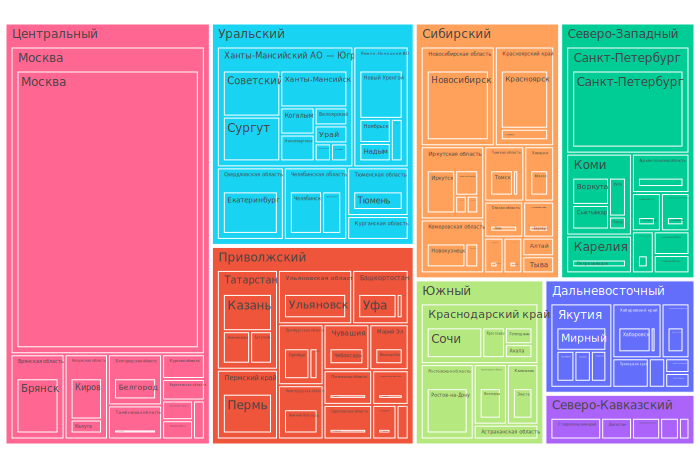

In [66]:
df_cities_reg["cities"] = "federal_unit" # in order to have a single root node
fig = px.treemap(df_cities_reg, path=['federal_unit', 'region', 'city'], values='average_flights',
                  color='federal_unit',
                  color_continuous_scale='RdBu',
                 title='fff'
                )
fig.update_layout(    #autosize=False,
    width=1000,
    height=600,
    margin=dict(l=0, r=0, t=0, b=0)
)
fig.show("svg")

Общий вид диаграммы дает представление о среднесуточном количестве рейсов по различным федеральным округам. Сразу можно оценить насколько авиаперелеты в Москве превышают показатели сразу нескольких округов. При на жатии на карточку федерального округа появляется более детальная картина в разбивке по регионам, входящим в этот округ. И, наконец, в блоке региона мы видим как соотносятся показатели между городами одного региона. Точные значения среднего числа рейсов в сутки можно увидеть, если навести курсор на название города.

В целом, график дает представление об активности авиаперевозок в различных городах. Лучше видны крупные города и транспортные центры регионов.

#### Построим диаграмму количества рейсов по десяти городам России с самыми большими показателями, полученным в пункте 3.1.

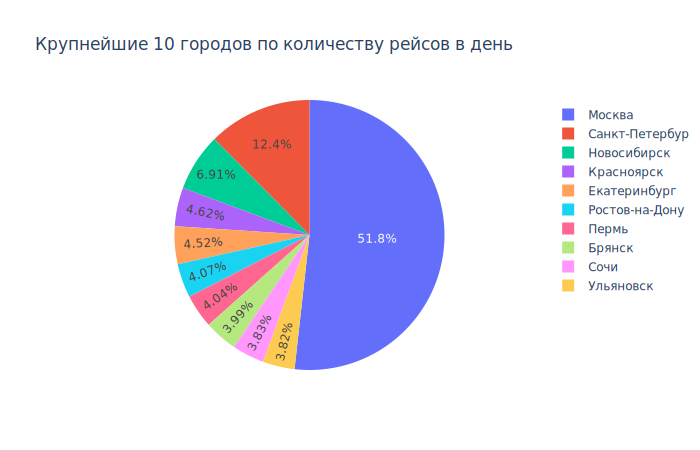

In [67]:
fig = px.pie(df_cities_top, values='average_flights', names='city', color='city',
             title = 'Крупнейшие 10 городов по количеству рейсов в день'
#              color_discrete_map={}
            )
fig.show("svg")

На круговой диаграмме видно, что в Москве совершается более половины рейсов среди крупных городов России, дальше идет Санкт-Петербург с 12,4% авиаперевозок и за ним остальные 8 городов с показателями от 3,82% до 6,91%. 

### Общий вывод

Проведен анализ поведения клиентов авиакомпании в разных городах России в августе-сентябре 2018 года. Была сделана выборка значений количества перелетов в Москве с указанием дат музыкальных фестивалей, проходящих в это время.
По результатам анализа также выявлены наиболее часто ипользуемые модели самолетов. В таблице представлены данные о трех самых часто используемых моделях

| |Cessna 208 Caravan|Bombardier CRJ-200|Sukhoi SuperJet-100|
|:----|:----|:----|:----|
|Количество рейсов|4557|4446|4185|

Также были подсчитаны средние значения числа прибывающих в день рейсов для разных городов России и построены соответствующие графики. Для иллюстрации распределения среднесуточного количества рейсов по более чем ста городам, данные были обогащены информацией из Википедии о территориальной принадлежности каждого города к соответствующему региону и федеральному округу России. Группировка городов по регионам и визуализация данных с помощью Treemap дала полную картину числа пассажирских перелетов.